<a href="https://colab.research.google.com/github/anabelcarol/PythonData-Analysis/blob/master/PyTorch_Keras/Classification/Keras_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch_Keras/Classification setting:
Main focus on how to identify and deal with overfitting through __Early Stopping Callbacks__ and __Dropout Layers__

** __Early Stopping__ Callbacks: keras automatically stop training based on a __loss__ condition on the validation data passed during the model.fit() call.

** __Dropout Layers__: are layers that can be added to turn off neurons during training to prevent overfitting. Each dropout layer will 'drop' a user-defined percentage of neuron units in the previous layer every batch.


## Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

### The Data

#### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [0]:
import pandas as pd
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DeepLearning_TensorFlow/TensorFlow_FILES/DATA/cancer_classification.csv')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [0]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

For classification settings, it is usually useful to plot the target variable to check if the dataset is balanced or not

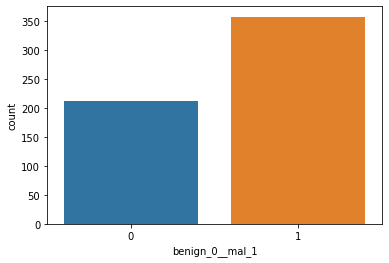

In [0]:
sns.countplot(x='benign_0__mal_1',data=df)

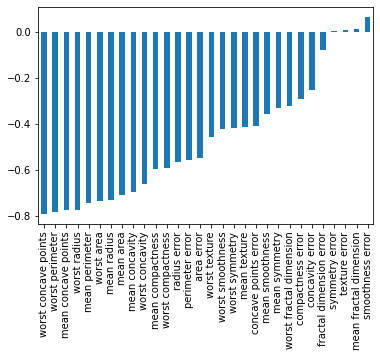

In [0]:
# correlations with respect to the target variable 'benign or maling'
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

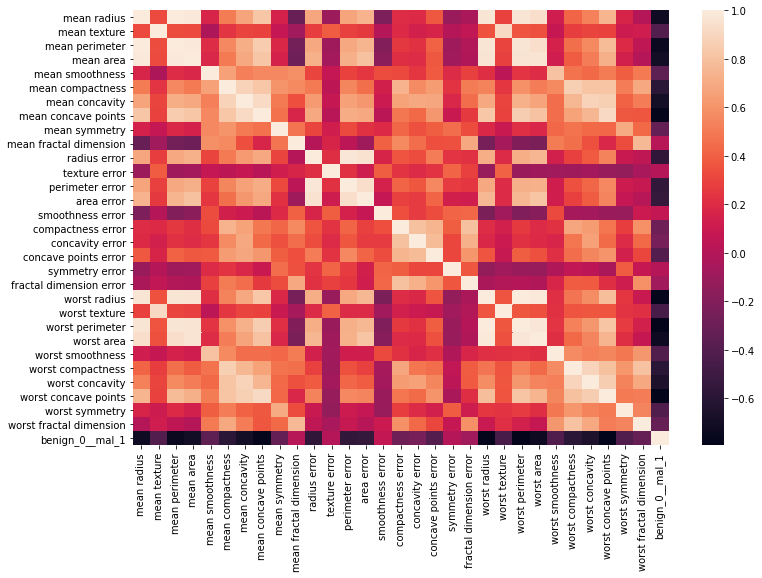

In [0]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

## Train Test Split

In [0]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [0]:
# import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [0]:
X_train.shape

(426, 30)

In [0]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))

# for binary_classification problem
model.add(Dense(units=1,activation='sigmoid')) 

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [0]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 0s 14ms/step - loss: 0.6889 - val_loss: 0.6633
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6449 - val_loss: 0.6222
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6012 - val_loss: 0.5742
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5518 - val_loss: 0.5207
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4991 - val_loss: 0.4659
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4464 - val_loss: 0.4141
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3992 - val_loss: 0.3665
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3570 - val_loss: 0.3286
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3189 - val_loss: 0.2862
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2934 - val_loss: 0.2621
Epoch 11

In [0]:
# model.history.history

In [0]:
losses = pd.DataFrame(model.history.history)

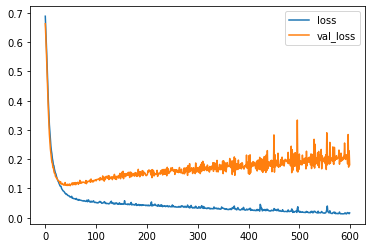

In [0]:
losses.plot()

_This is a clear example of overfitting_

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [0]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [0]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
# verbose = 1 --> just a small report
# patience --> we wait 25 epochs even after we have kind of detecting a stoping point because of noise that could occur


In [0]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )
# it is going to attempt to run on 600 epochs unless the early stop is triggered. 
# in this case it is triggered. the training stopped

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6624 - val_loss: 0.6395
Epoch 2/600
14/14 [==============================] - 0s 27ms/step - loss: 0.6192 - val_loss: 0.5999
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5784 - val_loss: 0.5589
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5377 - val_loss: 0.5172
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4969 - val_loss: 0.4766
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4580 - val_loss: 0.4382
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4222 - val_loss: 0.3996
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3883 - val_loss: 0.3656
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3580 - val_loss: 0.3360
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3307 - val_loss: 0.3090
Epoch 1

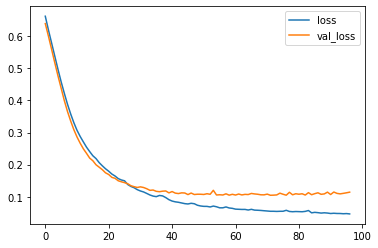

In [0]:
# the fit stopped at 97 epochs.

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

flattening is ok for val_loss

## Example Three: Adding in DropOut Layers

In [0]:
from tensorflow.keras.layers import Dropout

In [0]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5)) # rate --> the portion of neurons that we turn off
# rate = 1 --> 100% of neurons will be turn off
# rate = 0 --> 0% neurons will be turn off

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [0]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.7247 - val_loss: 0.6708
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6859 - val_loss: 0.6568
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6693 - val_loss: 0.6400
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6575 - val_loss: 0.6197
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6282 - val_loss: 0.5943
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6170 - val_loss: 0.5693
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5943 - val_loss: 0.5435
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5653 - val_loss: 0.5147
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5649 - val_loss: 0.4902
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5366 - val_loss: 0.4709
Epoch 11

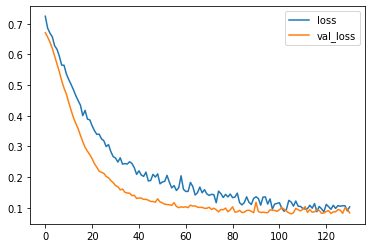

In [0]:
# the model stopped on the 131 epochs that is better because it continued to learn
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Train_Loss and Val_loss both are flatenning at the same time

# Model Evaluation

for classsification setting!!!!!

In [0]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


WARNING:tensorflow:From <ipython-input-38-bc83193b8b59>:1: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

In [0]:
# pred = model.predict((X_test) > 0.5).astype("int32")

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [0]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
